#**Trabalhando com Planilhas do Excel**

In [4]:
#Importando a biblioteca
import pandas as pd

In [5]:
#Leitura dos arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [6]:
df5.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Salvador,2018-01-01,31.06,1037,3
1,Salvador,2018-01-01,19.02,1034,3
2,Salvador,2019-02-10,173.59,1035,3
3,Salvador,2019-02-10,176.34,1037,3
4,Salvador,2019-02-14,19.47,1037,3


In [7]:
#juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [8]:
#Exibindo as 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [9]:
#Exibindo as 5 últimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [10]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
109,Aracaju,2018-01-01,51.64,1523,5
96,Fortaleza,2019-01-01,23.31,1004,4
210,Salvador,2019-01-02,197.64,1035,1
46,Aracaju,2018-01-01,41.42,1522,2
8,Fortaleza,2019-02-11,37.49,1005,1


In [11]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [12]:
#Alterando o tipo de dado da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [13]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [14]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


**Tratando valores faltantes**

In [15]:
#Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [16]:
#Substituindo os valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [17]:
df["Vendas"].mean()

122.61180089485438

In [18]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [19]:
df.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde
207,Natal,2019-01-02,46.70,1036,2
233,Salvador,2019-01-03,172.40,1036,2
209,Salvador,2019-01-02,69.98,1034,2
176,Natal,2019-01-02,19.42,1035,3
185,Natal,2019-01-02,6.67,1036,1
18,Fortaleza,2019-01-01,38.31,1002,3
69,Salvador,2019-01-01,14.79,1035,1
113,Recife,2019-03-02,38.63,980,2
44,Aracaju,2018-01-01,11.42,1520,5
15,Recife,2019-01-01,7.45,981,2


In [20]:
#Substituindo os valores nulos por zero
df["Vendas"].fillna(0, inplace=True)

In [21]:
#Apagando as linhas com valores nulos
df.dropna(inplace=True)

In [22]:
#Apagando as linhas com valores nulos com base apenas em 1 coluna
df.dropna(subset=["Vendas"], inplace=True)

In [23]:
#Removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

**Criando colunas novas**

In [24]:
#Criando a coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [25]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [26]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"] 

In [27]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [28]:
#Retornando a maior receita
df["Receita"].max()

3544.0

In [29]:
#Retornando a menor receita
df["Receita"].min()

3.34

In [30]:
#nlargest
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [31]:
#nsamllest
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [32]:
#Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [33]:
#Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


#**Trabalhando com datas**

In [34]:
#Trasnformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

In [35]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [36]:
#Transformando coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [37]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [38]:
#Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [39]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [40]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
70,Aracaju,2018-01-01,8.44,1523,9,75.96,9.0,2018
38,Natal,2018-02-25,828.00,852,4,3312.00,4.0,2018
29,Aracaju,2018-01-01,44.04,1520,6,264.24,6.0,2018
72,Salvador,2019-01-01,149.47,1036,3,448.41,3.0,2019
95,Fortaleza,2019-01-01,35.28,1002,2,70.56,2.0,2019


In [41]:
#Extraindo o mês e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [42]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda
26,Fortaleza,2019-01-01,18.93,1005,2,37.86,2.0,2019,1,1
70,Aracaju,2018-01-01,8.44,1523,9,75.96,9.0,2018,1,1
110,Recife,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2
116,Natal,2019-01-02,41.78,1034,3,125.34,3.0,2019,1,2
106,Salvador,2019-01-01,149.19,1035,2,298.38,2.0,2019,1,1


In [43]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [44]:
#Calculando a diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [45]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias
125,Fortaleza,2019-03-02,37.60,983,4,150.40,4.0,2019,3,2,425 days
198,Salvador,2019-01-02,13.65,1037,3,40.95,3.0,2019,1,2,366 days
116,Fortaleza,2019-03-02,79.10,982,2,158.20,2.0,2019,3,2,425 days
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days
71,Recife,2019-01-01,138.69,983,3,416.07,3.0,2019,1,1,365 days


In [46]:
#Criando a coluna de trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [47]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
59,Recife,2019-01-01,89.39,983,5,446.95,5.0,2019,1,1,365 days,1
233,Natal,2019-01-03,172.40,1036,2,344.80,2.0,2019,1,3,367 days,1
95,Aracaju,2018-01-01,127.43,1522,9,1146.87,9.0,2018,1,1,0 days,1
3,Salvador,2019-02-10,176.34,1037,3,529.02,3.0,2019,2,10,405 days,1
32,Recife,2019-01-01,15.93,982,7,111.51,7.0,2019,1,1,365 days,1


In [48]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [49]:
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
135,Recife,2019-03-02,10.79,983,5,53.95,5.0,2019,3,2,425 days,1
133,Fortaleza,2019-03-02,14.67,980,7,102.69,7.0,2019,3,2,425 days,1
123,Salvador,2019-03-02,127.45,1036,3,382.35,3.0,2019,3,2,425 days,1
127,Fortaleza,2019-03-02,39.56,982,8,316.48,8.0,2019,3,2,425 days,1
140,Recife,2019-03-02,166.89,983,5,834.45,5.0,2019,3,2,425 days,1
46,Natal,2019-03-26,753.00,853,2,1506.00,2.0,2019,3,26,449 days,1
121,Fortaleza,2019-03-02,41.55,981,3,124.65,3.0,2019,3,2,425 days,1
123,Recife,2019-03-02,20.22,981,6,121.32,6.0,2019,3,2,425 days,1
129,Salvador,2019-03-02,125.66,1037,1,125.66,1.0,2019,3,2,425 days,1
130,Recife,2019-03-02,12.36,983,4,49.44,4.0,2019,3,2,425 days,1


array([[<AxesSubplot:title={'center':'Data'}>,
        <AxesSubplot:title={'center':'Vendas'}>,
        <AxesSubplot:title={'center':'Qtde'}>],
       [<AxesSubplot:title={'center':'Receita'}>,
        <AxesSubplot:title={'center':'Receita/Vendas'}>,
        <AxesSubplot:title={'center':'Ano_Venda'}>],
       [<AxesSubplot:title={'center':'mes_venda'}>,
        <AxesSubplot:title={'center':'dia_venda'}>,
        <AxesSubplot:title={'center':'trimestre_venda'}>]], dtype=object)

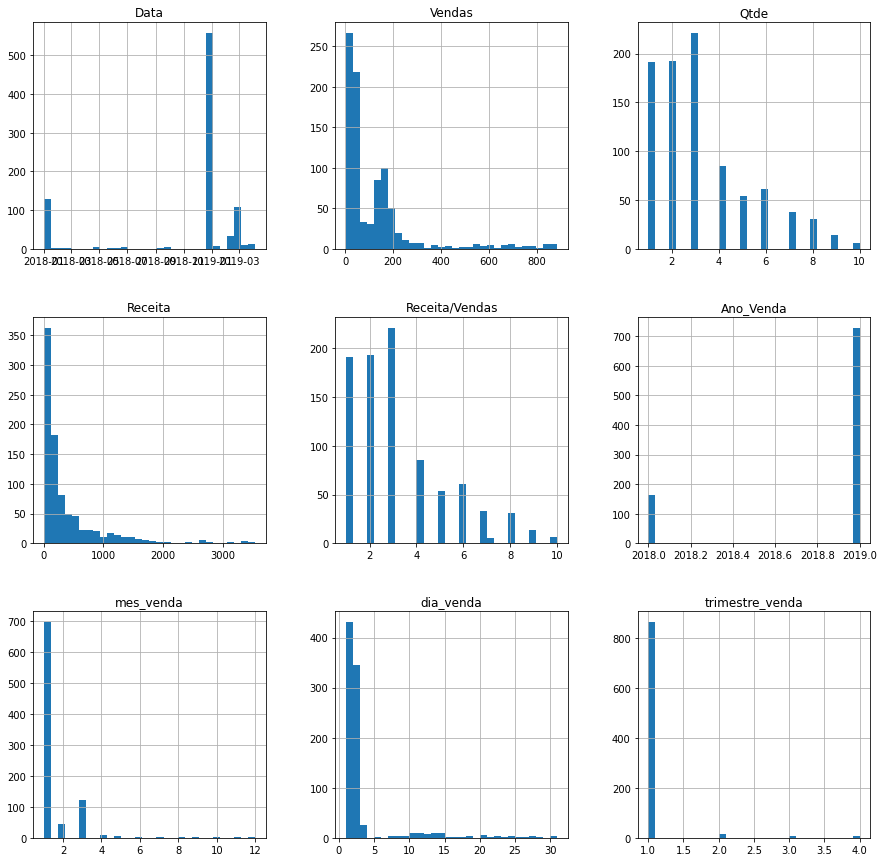

In [57]:
df.hist(figsize=(15,15), bins=30)